In [1]:
#API 제공 라이브러리
import openai
from gtts import gTTS
import speech_recognition as sr

#주피터 노트북 음성 재생용 라이브러리(수정 필요)
import IPython.display as ipd
from IPython.display import clear_output 
#음성 출력 딜레이용 라이브러리#
import time
from mutagen.mp3 import MP3
#얼굴 감지 딥러닝 및 이미지 출력
import cv2
import cvlib as cv
import matplotlib.pyplot as plt
import numpy as np
import sys

In [12]:
messages = [{"role": "system", "content": "You are a helpful assistant."}]
def recognize_speech():
    r = sr.Recognizer()
    result = None
    while result is None:
        try:
            with sr.Microphone() as source:
                print("질문 하세요")
                audio = r.listen(source)
                result = r.recognize_google(audio, language="ko-KR")
                print("Ques :",result)
                
        except sr.UnknownValueError:
            print("음성을 이해하지 못했습니다. 다시 시도해주세요.")
        except sr.RequestError as e:
            print("구글 스피치 인식 서비스에 접근할 수 없습니다. 다시 시도해주세요.")
    return result

def generate_response(ques):
    messages.append({"role" : "user", "content" : f"{ques}"})
    response = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages = messages)
    answ = response.choices[0].message["content"].strip()
    messages.append({"role": "assistant", "content": f"{answ}"})
    return answ

def speak(text):
    tts = gTTS(text=text, lang='ko')
    tts.save('answer.mp3')

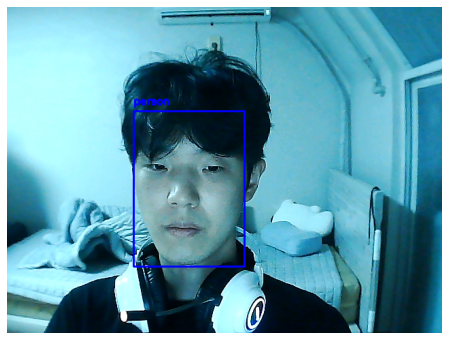

질문 하세요
Ques : 안녕


Answer: 안녕하세요! 무엇을 도와드릴까요?
질문 하세요
Ques : 프로그램 종료


SystemExit: 0

C:\Users\01093\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
def main():    
    %matplotlib inline
    cap = cv2.VideoCapture(0)

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            faces, confidences = cv.detect_face(frame, enable_gpu=True)
            face_detected = False
            for idx, rect in enumerate(faces):
                if confidences[idx] >= 0.5:
                    face_detected = True
                    (startX, startY) = rect[0], rect[1]
                    (endX, endY) = rect[2], rect[3]
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (255, 0, 0), 2)
                    cv2.putText(frame, "person", (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            ###이미지 출력###
            clear_output(wait=True)
            plt.figure(figsize=(8,6))
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

            if face_detected:
                loop = False
                while not loop:
                    ques = recognize_speech()
                    
                    if ques == "대화 종료" or ques == "대화종료":
                        print("대화를 종료합니다.")
                        loop = True
                        
                    elif ques == "프로그램 종료" or ques == "프로그램종료":
                        sys.exit(0)
                        
                    else:
                        answ = generate_response(ques)
                        answ2 = speak(answ)
                        audio = MP3("answer.mp3")
                        length = audio.info.length
                        ipd.display(ipd.Audio('answer.mp3', autoplay=True))
                        print("Answer:", answ)
                        time.sleep(length)
                    

                    
    finally:
        cv2.destroyAllWindows()
        cap.release()
    
if __name__ == "__main__":
    main()
    
#     except KeyboardInterrupt:
#     print("종료합니다.")
    

In [5]:
messages

[{'role': 'system', 'content': 'You are a helpful assistant.'}]